In [1]:
# initial setup for any notebook

%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/home/yarcoh/projects/thesis-code4") # go to parent dir

In [2]:
# imports

from src.general_methods.visualizer import Visualizer
from src.deep.data_analyzer import DataAnalyzer
from tqdm.notebook import tqdm

In [3]:
# configs

path = f'/data/yarcoh/thesis_data/data/datasets/qam16_100001x20'
mu = 0.01
data_id = 0
n_permutations_for_ber = 5000
is_box_plot = False

In [4]:
# load data
data_analyzer = DataAnalyzer(path, _tqdm=tqdm, is_box_plot=is_box_plot, verbose_level=1)

the folder /data/yarcoh/thesis_data/data/datasets/qam16_100001x20/100001_samples_mu=0.200 contains 100001 samples


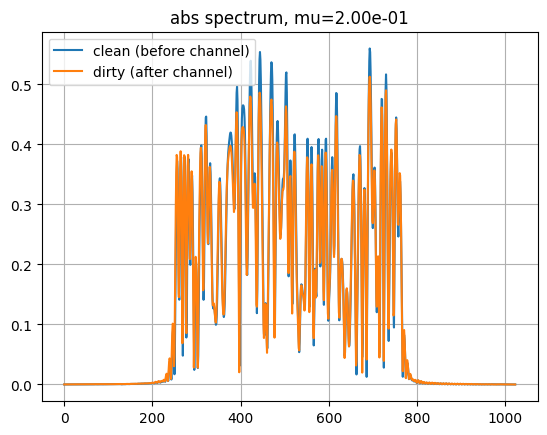

x_power=0.04575082792278706
y_power=0.042674198916778365
ber=0.0


In [5]:
# plot single sample
data_analyzer.plot_single_sample(mu=mu, data_id=data_id, is_save=False)

In [6]:
# upload to wandb single sample
data_analyzer.wandb_log_single_sample(mu=mu, data_id=data_id)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: yarden92. Use `wandb login --relogin` to force relogin


the folder /data/yarcoh/thesis_data/data/datasets/qam16_100001x20/100001_samples_mu=0.200 contains 100001 samples
uploaded to wandb mu=0.01, i=0


  0%|          | 0/21 [00:00<?, ?it/s]

loaded 100001 x files and 100001 y files.
folder /data/yarcoh/thesis_data/data/datasets/qam16_100001x20/100001_samples_mu=0.200 has 5000 signals with total 0 errors -> ber = 0.0
loaded 100001 x files and 100001 y files.
folder /data/yarcoh/thesis_data/data/datasets/qam16_100001x20/100001_samples_mu=0.205 has 5000 signals with total 0 errors -> ber = 0.0
loaded 100001 x files and 100001 y files.
folder /data/yarcoh/thesis_data/data/datasets/qam16_100001x20/100001_samples_mu=0.211 has 5000 signals with total 144 errors -> ber = 0.0001125
loaded 100001 x files and 100001 y files.
folder /data/yarcoh/thesis_data/data/datasets/qam16_100001x20/100001_samples_mu=0.216 has 5000 signals with total 0 errors -> ber = 0.0
loaded 100001 x files and 100001 y files.
folder /data/yarcoh/thesis_data/data/datasets/qam16_100001x20/100001_samples_mu=0.221 has 5000 signals with total 4 errors -> ber = 3.125e-06
loaded 100001 x files and 100001 y files.
folder /data/yarcoh/thesis_data/data/datasets/qam16_10

/home/yarcoh/projects/thesis-code4/src/optics/channel_blocks.py:77: RuntimeWarning: invalid value encountered in log
  return -np.log((2 / (x + 1)) - 1)


folder /data/yarcoh/thesis_data/data/datasets/qam16_100001x20/100001_samples_mu=0.258 has 5000 signals with total 723 errors -> ber = 0.00056484375
loaded 100001 x files and 100001 y files.
folder /data/yarcoh/thesis_data/data/datasets/qam16_100001x20/100001_samples_mu=0.263 has 5000 signals with total 9463 errors -> ber = 0.00739296875
loaded 100001 x files and 100001 y files.
folder /data/yarcoh/thesis_data/data/datasets/qam16_100001x20/100001_samples_mu=0.268 has 5000 signals with total 1078 errors -> ber = 0.0008421875
loaded 100001 x files and 100001 y files.
folder /data/yarcoh/thesis_data/data/datasets/qam16_100001x20/100001_samples_mu=0.274 has 5000 signals with total 3173 errors -> ber = 0.00247890625
loaded 100001 x files and 100001 y files.
folder /data/yarcoh/thesis_data/data/datasets/qam16_100001x20/100001_samples_mu=0.279 has 5000 signals with total 37308 errors -> ber = 0.029146875
loaded 100001 x files and 100001 y files.
folder /data/yarcoh/thesis_data/data/datasets/qa

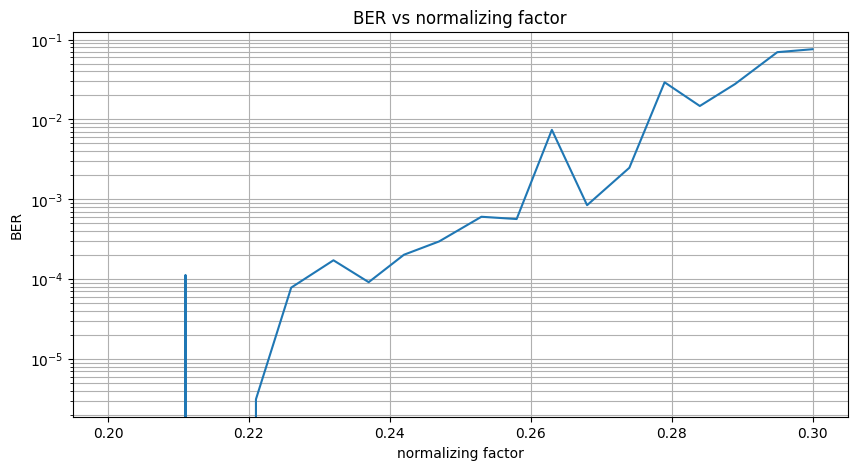

ber vs mu saved to /data/yarcoh/thesis_data/data/datasets/qam16_100001x20/_analysis/ber_vs_mu.png


In [7]:
# plot full ber graph
data_analyzer.plot_full_ber_graph(permute_limit=n_permutations_for_ber, is_save=False)

In [8]:
# upload to wandb full ber graph
data_analyzer.wandb_log_ber_vs_mu(n=n_permutations_for_ber)

###  THE END

In [9]:
png_path = '/data/yarcoh/thesis_data/data/datasets/qam16_5001x50/_analysis/ber_vs_mu.png'
import os
print(os.path.exists(png_path))
# print(f'ber is saved in {png_path}')

False


the folder /data/yarcoh/thesis_data/data/datasets/qam16_100001x20/100001_samples_mu=0.200 contains 100001 samples


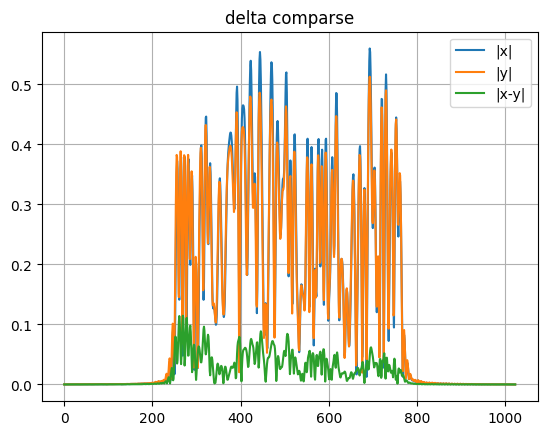

In [10]:
# watch difference between original and noised data
import numpy as np
import matplotlib.pyplot as plt

data_id = 0
mu_cropped = 0.015
sub_name = data_analyzer._get_sub_folder_name(mu_cropped)
x,y = data_analyzer._get_xy(data_id,sub_name)

indices = range(len(x))
delta = np.abs(x-y)

Visualizer.my_plot(indices,np.abs(x),
                   indices,np.abs(y),
                   indices,delta,
                   name='delta comparse',
                   legend=['|x|','|y|','|x-y|'])

In [ ]:
# chatGPT's version for grid print of the dataset:

import os
from tabulate import tabulate

# Define the directory path
directory = "/data/yarcoh/thesis_data/data/datasets"

# Initialize a dictionary to store the counts
counts = {}

# Read the directory
for folder in os.listdir(directory):
    if os.path.isdir(os.path.join(directory, folder)):
        # Split the folder name into parts
        parts = folder.split('_')
        if len(parts) == 2:
            samples, mus = parts[1].split('x')
            key = (samples, mus)
            counts[key] = counts.get(key, 0) + 1

# Check if there are any counts
if not counts:
    print("No matching folders found.")
else:
    # Find the unique samples and mus values
    samples_list = sorted(set(key[0] for key in counts), key=int)
    mus_list = sorted(set(key[1] for key in counts), key=int)

    # Create the matrix
    matrix = []
    for sample in samples_list:
        row = [sample]
        for mus in mus_list:
            count = counts.get((sample, mus), 0)
            cell_value = "" if count == 0 else count
            row.append(cell_value)
        matrix.append(row)
    
    # Prepare the table headers
    headers = ['Samples \\ mu'] + mus_list

    # Generate the table using tabulate
    table = tabulate(matrix, headers, tablefmt="pretty")

    # Print the table
    print(table)
